JERZY ANDRZEJEWSKI 230347

TASK 1

In [1]:
import skimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import numpy as np
import cv2 as cv
import math
import random

In [2]:
example_matrix = np.random.randint(0, 255 , (5, 9), dtype=np.uint8)

Defining functions which will be used to finish task 1

In [3]:
def flip(matrix = None, direction = 'horizontal'):
    try:
        if direction == 'horizontal':
            # return np.flipud(example_matrix)
            return matrix[::-1]
        elif direction == 'vertical':
            # return np.fliplr(example_matrix)
            return matrix[:, ::-1]
    except:
        print('Error while trying to flip a matrix')
        
def rotate(matrix = None, direction = 90):
    try:
        if len(matrix.shape) == 3:
            if direction == 90:
                #return np.rot90(matrix, axes = (1,0))
                return np.transpose(matrix, axes=[1,0,2])[::, ::-1]
            elif direction == -90:
                #return np.rot90(matrix, axes = (0, 1))
                return np.transpose(matrix[::, ::-1], axes=[1,0,2])
            elif direction == 180:
                #return np.rot90(matrix, k = 2, axes = (1,0))
                return matrix[::-1, ::-1]
        else:
            if direction == 90:
                #return np.rot90(array, axes = (1,0))
                return matrix.T[::, ::-1]
            elif direction == -90:
                #return np.rot90(array, axes = (0, 1))
                return matrix[::, ::-1].T
            elif direction == 180:
                #return np.rot90(array, k = 2, axes = (1,0))
                return matrix[::-1, ::-1]
    except:
        print('Error while trying to rotate a matrix')
        
def extend(matrix = None):
    #try:
        if len(matrix.shape) == 3:
            if matrix.shape[0] < matrix.shape[1]:
                for x in range(matrix.shape[1] - matrix.shape[0]):
                    matrix = np.vstack([matrix, np.zeros((1, matrix.shape[1], 3))])
            elif matrix.shape[0] > matrix.shape[1]:
                for x in range(matrix.shape[0] - matrix.shape[1]):
                    matrix = np.c_[matrix, np.zeros((matrix.shape[0], 1, 3))]
        else:
            if matrix.shape[0] < matrix.shape[1]:
                for x in range(matrix.shape[1] - matrix.shape[0]):
                    matrix = np.vstack([matrix, np.zeros(matrix.shape[1])])
            elif matrix.shape[0] > matrix.shape[1]:
                for x in range(matrix.shape[0] - matrix.shape[1]):
                    matrix = np.c_[matrix, np.zeros(matrix.shape[0])]
        return matrix
    
    #except:
        #print('Cannot extend None matrix')
        
def shrink(matrix = None):
    #try:
    if matrix.shape[0] < matrix.shape[1]:
        shrink_size = math.ceil((matrix.shape[1]-matrix.shape[0])/2)
        matrix = matrix[0:matrix.shape[0], shrink_size:matrix.shape[1]-shrink_size]
    elif matrix.shape[0] > matrix.shape[1]:
        shrink_size = math.ceil((matrix.shape[0]-matrix.shape[1])/2)
        matrix = matrix[shrink_size:matrix.shape[0]-shrink_size, 0:matrix.shape[1]]
    
    return matrix
    
    #except:
        #print('Cannot shrink None matrix')

USAGE OF FUNCTIONS

In [4]:
print(example_matrix)

[[121   4 180  93 172   5 121 169 193]
 [198  48  72 212 226  86  87 190 176]
 [ 21 125  49 131 100 201 113 132  87]
 [ 34 236 151 138 210  57 226  99  86]
 [ 92  97  73 119  59 227 138  80   3]]


flips

In [5]:
print(flip(example_matrix, direction = 'horizontal'))
print()
print(flip(example_matrix, direction = 'vertical'))

[[ 92  97  73 119  59 227 138  80   3]
 [ 34 236 151 138 210  57 226  99  86]
 [ 21 125  49 131 100 201 113 132  87]
 [198  48  72 212 226  86  87 190 176]
 [121   4 180  93 172   5 121 169 193]]

[[193 169 121   5 172  93 180   4 121]
 [176 190  87  86 226 212  72  48 198]
 [ 87 132 113 201 100 131  49 125  21]
 [ 86  99 226  57 210 138 151 236  34]
 [  3  80 138 227  59 119  73  97  92]]


rotations

In [6]:
print(rotate(example_matrix, direction = 90))
print()
print(rotate(example_matrix, direction = -90))
print()
print(rotate(example_matrix, direction = 180))

[[ 92  34  21 198 121]
 [ 97 236 125  48   4]
 [ 73 151  49  72 180]
 [119 138 131 212  93]
 [ 59 210 100 226 172]
 [227  57 201  86   5]
 [138 226 113  87 121]
 [ 80  99 132 190 169]
 [  3  86  87 176 193]]

[[193 176  87  86   3]
 [169 190 132  99  80]
 [121  87 113 226 138]
 [  5  86 201  57 227]
 [172 226 100 210  59]
 [ 93 212 131 138 119]
 [180  72  49 151  73]
 [  4  48 125 236  97]
 [121 198  21  34  92]]

[[  3  80 138 227  59 119  73  97  92]
 [ 86  99 226  57 210 138 151 236  34]
 [ 87 132 113 201 100 131  49 125  21]
 [176 190  87  86 226 212  72  48 198]
 [193 169 121   5 172  93 180   4 121]]


extensions

In [7]:
print(extend(example_matrix))

[[121.   4. 180.  93. 172.   5. 121. 169. 193.]
 [198.  48.  72. 212. 226.  86.  87. 190. 176.]
 [ 21. 125.  49. 131. 100. 201. 113. 132.  87.]
 [ 34. 236. 151. 138. 210.  57. 226.  99.  86.]
 [ 92.  97.  73. 119.  59. 227. 138.  80.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]


shrinks

In [8]:
print(shrink(example_matrix))

[[180  93 172   5 121]
 [ 72 212 226  86  87]
 [ 49 131 100 201 113]
 [151 138 210  57 226]
 [ 73 119  59 227 138]]


TASK 2

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

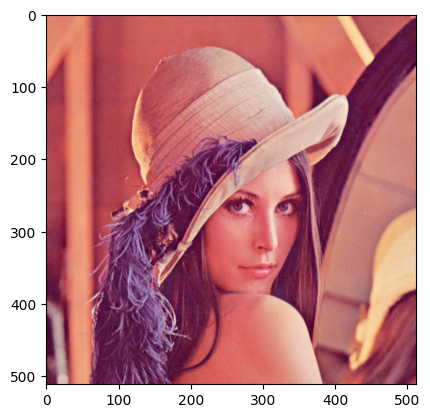

In [10]:
task2_img = mpimg.imread('lena.png')
imgplot = plt.imshow(task2_img)
plt.show()

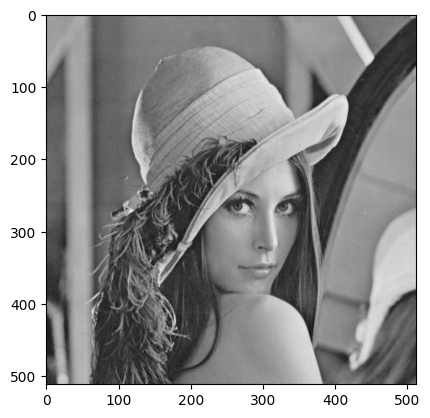

In [11]:
# luma transform from https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(task2_img)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

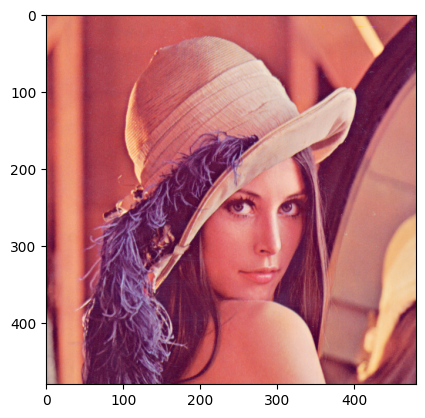

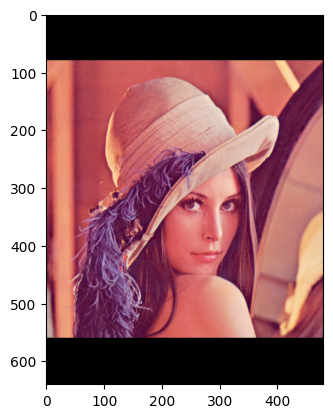

In [12]:
blank_img = np.zeros([640,480,3])
# could be saved for example using imageio.imwrite

# shrink lena so it can be pasted into the blank_img because the values are hard coded when shrinking they can also be
# if values were not hardcoded 16 can be changed to shrink_size/2 and 396 can be shape[0/1]-(shrink_size/2)
center_lena = task2_img[16:496, 16:496]

plt.imshow(center_lena)
plt.show()

shrink_size = int((blank_img.shape[0]-blank_img.shape[1])/2)
blank_img[shrink_size:blank_img.shape[0]-shrink_size, 0:blank_img.shape[1]] = center_lena

plt.imshow(blank_img)
plt.show()


FLIPS

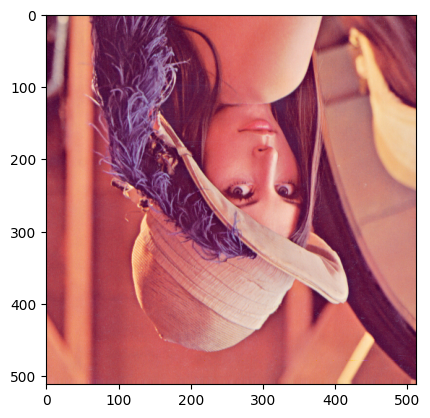

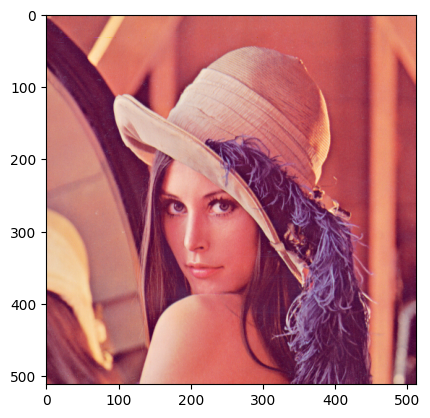

In [13]:
plt.imshow(flip(task2_img, direction = 'horizontal'))
plt.show()
plt.imshow(flip(task2_img, direction = 'vertical'))
plt.show()

ROTATIONS

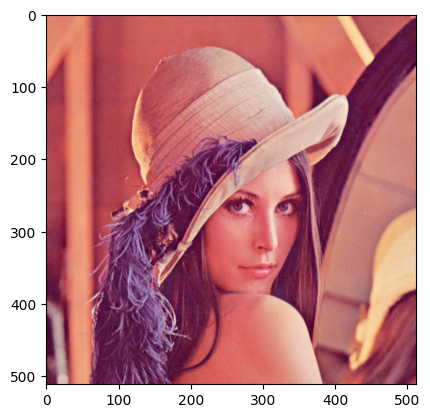

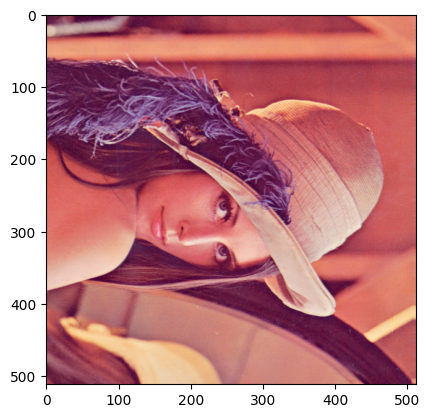

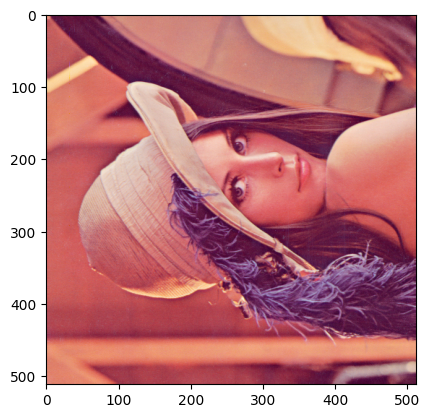

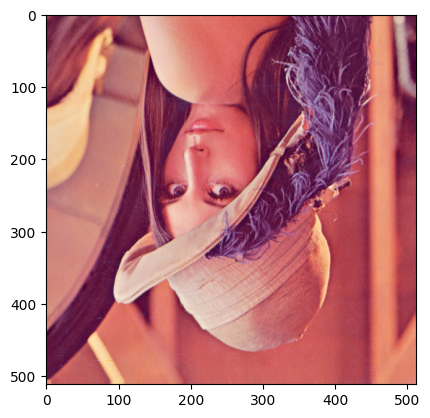

In [14]:
plt.imshow(task2_img)
plt.show()
plt.imshow(rotate(task2_img, direction = 90))
plt.show()
plt.imshow(rotate(task2_img, direction = -90))
plt.show()
plt.imshow(rotate(task2_img, direction = 180))
plt.show()

EXTENSIONS

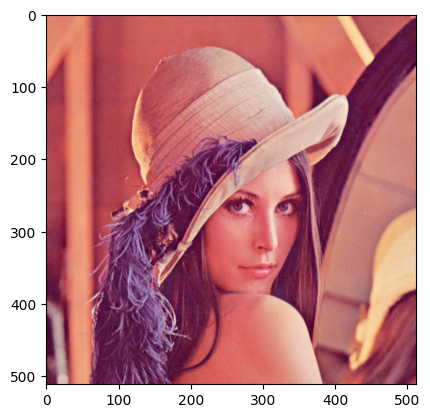

In [15]:
plt.imshow(extend(task2_img))
plt.show()

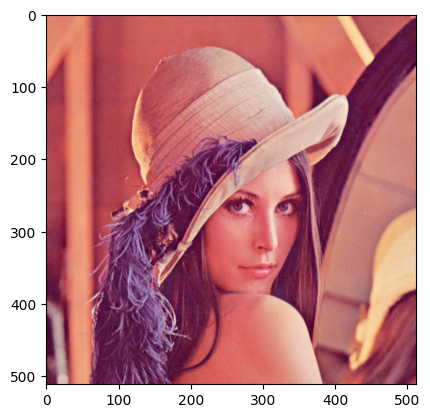

In [16]:
plt.imshow(shrink(task2_img))
plt.show()

EXTENSIONS AND SHRINKS ON DIFFERENT IMAGE

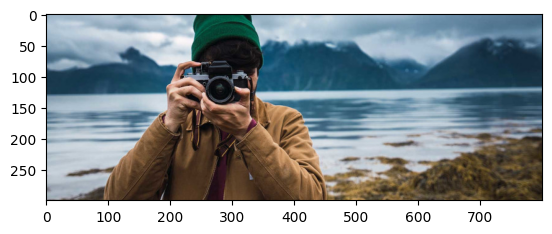

In [17]:
random_img = mpimg.imread('random_img.png')
imgplot = plt.imshow(random_img)
plt.show()

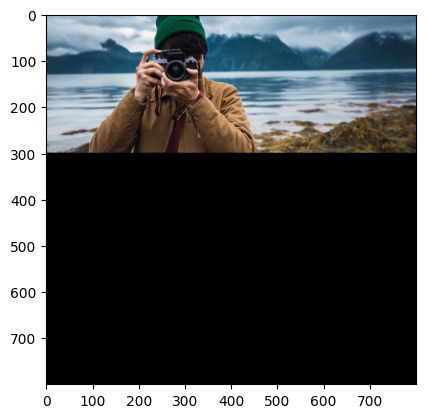

In [18]:
plt.imshow(extend(random_img))
plt.show()

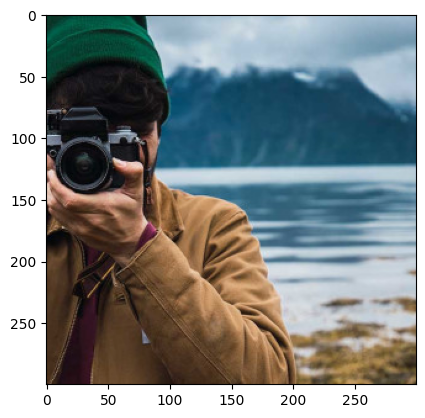

In [19]:
plt.imshow(shrink(random_img))
plt.show()

TASK 3

DEFINTIONS OF FUNCTIONS

In [20]:
def crop_photo(img, number_of_squares):
    division_rest = (img.shape[0]%number_of_squares)/2
    top_half = math.ceil(division_rest)
    down_half = math.floor(division_rest)
    img = img[down_half:img.shape[0] - top_half, down_half:img.shape[1] - top_half]
    return img

def prepare_list_of_chunks(img, number_of_squares):
    first_split = np.array_split(img, number_of_squares)

    list_of_chunks = []

    for x in first_split:
        second_split = np.array_split(x, number_of_squares, axis = 1)
        for z in second_split:
            list_of_chunks.append(z)

    random.shuffle(list_of_chunks)
    
    return list_of_chunks

def prepare_final_img(list_of_chunks, number_of_squares):
    prefinal_img = []

    for i in range(len(list_of_chunks)):
        index = math.floor(i/number_of_squares)
        if len(prefinal_img) - 1 < index:
            prefinal_img.append(list_of_chunks[i])
        else:
            prefinal_img[index] = np.concatenate((prefinal_img[index], list_of_chunks[i]))
            
    for i in range(1, len(prefinal_img)):
        prefinal_img[0] = np.concatenate((prefinal_img[0], prefinal_img[i]), axis=1)

    final_img = prefinal_img[0]
    
    return final_img

(310, 500, 3)


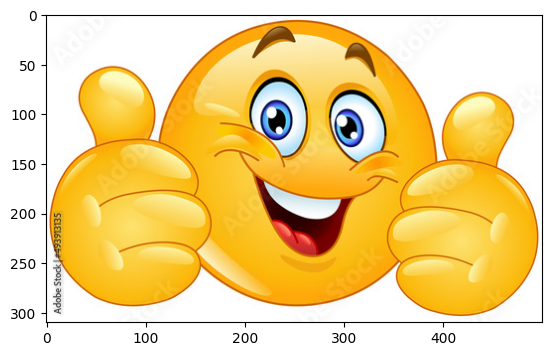

In [21]:
task3_img = mpimg.imread('like.png')
print(task3_img.shape)
imgplot = plt.imshow(task3_img)
plt.show()

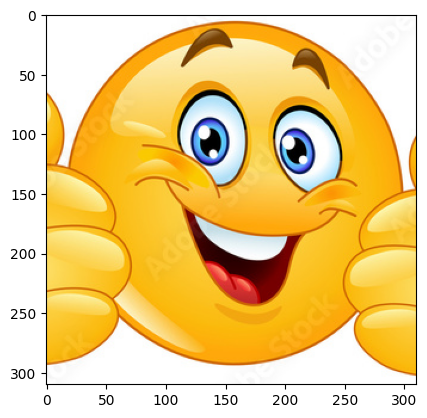

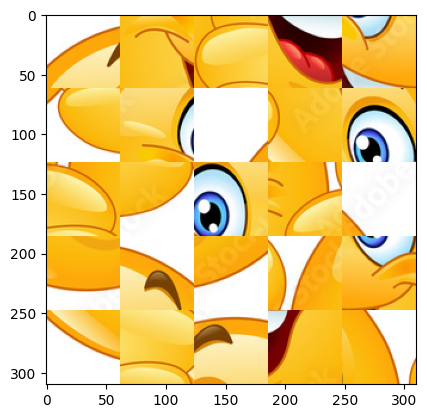

In [22]:
center_task3_img = shrink(task3_img)
imgplot = plt.imshow(center_task3_img)
plt.show()

number_of_squares = int(input())

center_task3_img = crop_photo(center_task3_img, number_of_squares)

list_of_chunks = prepare_list_of_chunks(center_task3_img, number_of_squares)

final_img = prepare_final_img(list_of_chunks, number_of_squares)

imgplot = plt.imshow(final_img)
plt.show()
